In [1]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [2]:
def show(img, i=1, title = "Picture"):
    plt.figure(i)
    plt.imshow(img,cmap=cm.gray, vmin=0, vmax=255)
    plt.title(title)
    plt.show()


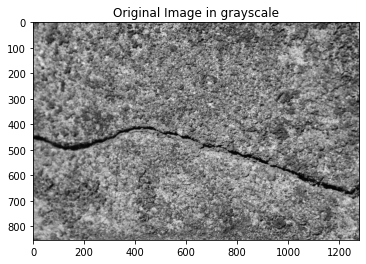

In [4]:
file = "design.jpeg"
og_img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
show(og_img, 1, "Original Image in grayscale")

# Thresholding using Adaptive Gaussian Filter

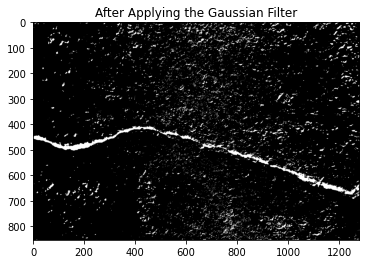

In [6]:
# Change this value to improve the filter
# Range [0, 255]
# Reduce the number to make the filter strict (more areas will be dark)
# Increase the number to make the filter lax (more areas wil be white)
threshold_value = 50

(thresh, binary_image) = cv2.threshold(og_img, threshold_value, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C|cv2.THRESH_BINARY_INV) #can use this one
show(binary_image, 1, "After Applying the Gaussian Filter")

final_img = binary_image

# Opening Operation

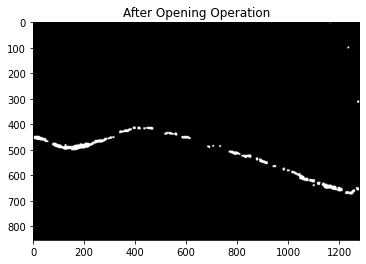

In [14]:
img_to_open = binary_image
kernelSize = (7, 7)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
opened_img = cv2.morphologyEx(img_to_open, cv2.MORPH_OPEN, kernel)

show(opened_img, 2, "After Opening Operation")

final_img = opened_img

In [20]:
cv2.destroyAllWindows()

# Closing Operation

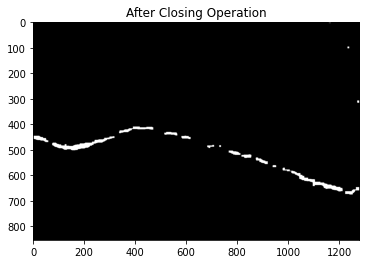

In [15]:
img_to_close = opened_img
kernelSize = (13, 13)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
closed_img = cv2.morphologyEx(img_to_close, cv2.MORPH_CLOSE, kernel)

show(closed_img, 3, "After Closing Operation") 

final_img = closed_img

# Images at various Stages

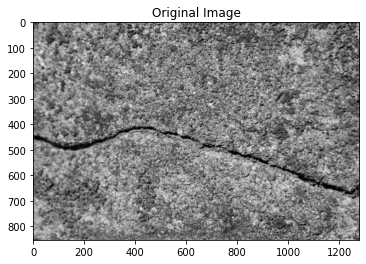

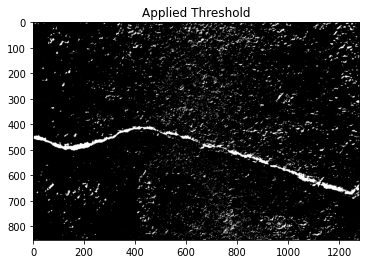

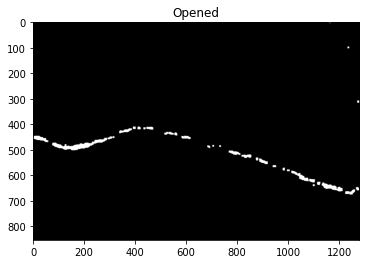

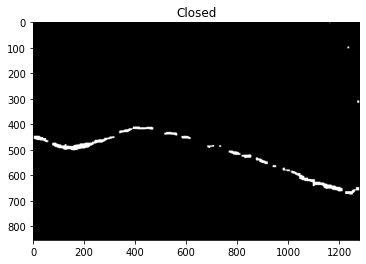

In [16]:
show(og_img, 1, "Original Image")
show(binary_image, 2, "Applied Threshold")
show(opened_img, 3, "Opened")
show(closed_img, 4, "Closed") 


# Save Image

In [41]:
# To select which image to be saved as final image, 
# uncomment the following line, and store appropriate image to it
# final_img = 
cv2.imwrite("Processed_image.jpg", final_img)

True

# Save All Images

In [19]:
cv2.imwrite("2_Grayscaled_img.jpg", og_img)
cv2.imwrite("3_AfterApplyingAdaptiveGaussianFilterForThresholding.jpg", binary_image)
cv2.imwrite("4_AfterOpeningOperation.jpg", opened_img)
cv2.imwrite("5_AfterClosingOperation.jpg", closed_img)

True